# OEL-02
Team Name : Capsule-Corp







Md. Sifat Aziz(190021131)


MD. Asib Rahman Jahin(190021202)


Wasik Billah Ibn Rashid(190021335)






#Introduction :

The dataset in question contains data related to HCV records,
encompassing demographic information such as age and test results from both Hepatitis C patients and blood donors. Among the various classifiers used, the AdaBoost_classifier emerged as the most effective for this dataset. The primary objective of this study is to perform an extensive statistical analysis of the dataset and identify the most appropriate and efficient model for the task at hand.





#Objectives:




- Enhance the detection of the Hepatitis C virus (HCV) to provide valuable support to medical professionals.
- Propose a more effective machine learning algorithm for improved prediction accuracy.
- Improve the accuracy of the existing algorithm to effectively handle large datasets through various data processing techniques.

#Data Set Overview:


(All attributes, except Category and Sex, are numerical. Laboratory data corresponds to attributes 5-14.)

The classification's target attribute is "Category," which serves to differentiate between individuals categorized as blood donors and those diagnosed with Hepatitis C, taking into account the specific stage of Hepatitis C they are in.

There is a total of 615 instances and 14 features, with five of them being target variables.



#Variable Overview:


Categorical variables are qualitative factors that cannot be quantified, with examples including nominal and ordinal categorical variables. The presentation of nominal variables does not require a specific order.

In the case of ordinal variables, it is essential to present them in an order that is easily understood, either randomly or based on the analyst's preference. For categorical variables, it is important to analyze the frequency of each category.

Analysis reveals the following distribution:
- "0=Blood Donor" accounts for 533 instances, or approximately 86.7% of the total.
- "0s=suspect Blood Donor" is represented in 7 instances, or roughly 1.1% of the total.
- "1=Hepatitis" comprises 24 instances, or about 3.9% of the total.
- "2=Fibrosis" is observed in 21 cases, accounting for approximately 3.4% of the total.
- "3=Cirrhosis" is noted in 30 instances, or around 4.9% of the total.

The most common element in this variable is "0=Blood Donor," with 533 counts.


#Process Diagram :
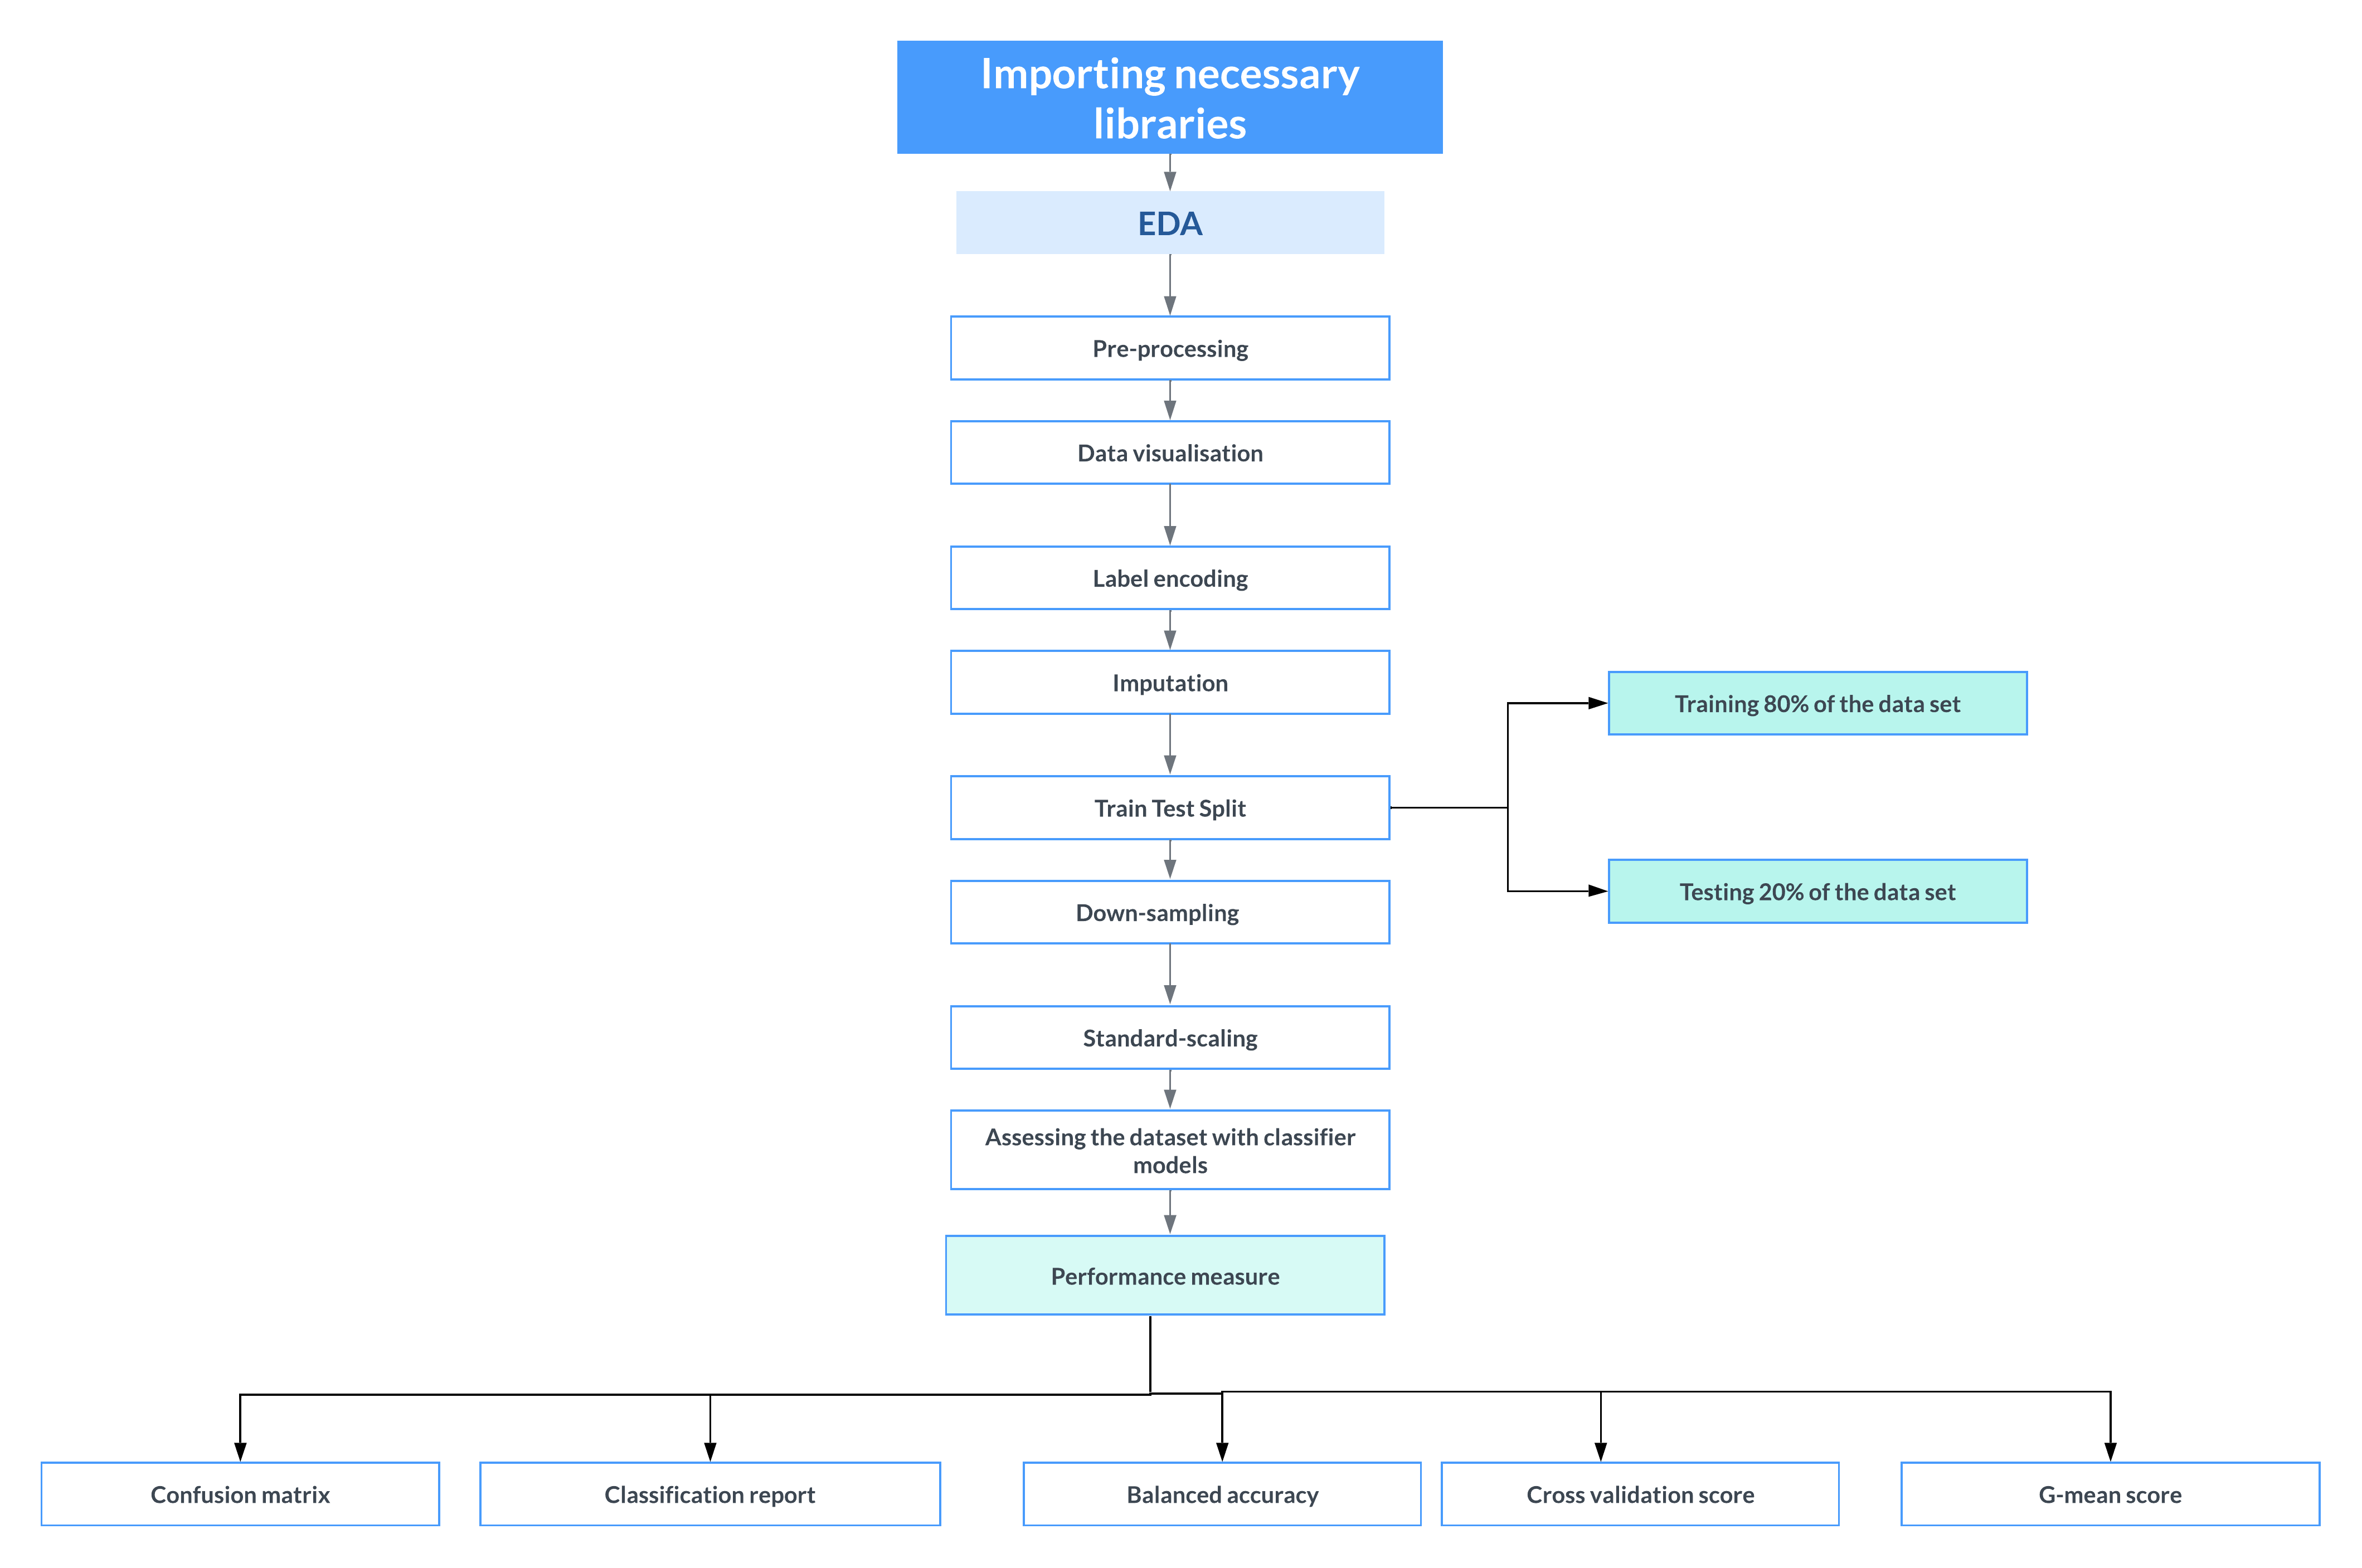

#Importing necessary libraries for visualization and algorithm performance.

In [1039]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

At first,the data was imported into https://colab.research.google.com and then the read.csv() function was used to feed the data to the system for the purpose of performing the analysis.Then for observing the data df.head() function was used.

In [1040]:
 df=pd.read_csv('hcvdatabin.csv')


Checking for the features:

In [1041]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#EDA(Exploratory Data Analysis):


First, whether there is any missing value was checked. After that identification of categorical and numerical features were determined. If any feature was highly uncorrelated or highly correlated was checked through correlation, histogram. Since almost all features were


Checking for missing/NaN values:

In [1042]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [1043]:
df.fillna(df.mean(), inplace=True)

<ipython-input-1043-bf934754a5b1>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



**Data Preprocessing**

Before analyzing the dataset, it was necessary to preprocess the data to ensure accuracy and precision. Missing data can lead to incorrect predictions and reduced model accuracy, making data preprocessing a critical step.

The dataset contained a total of 31 missing values. Each of the features ALB, ALT, and PROT had one missing value, while ALP and CHOL contained eighteen and ten missing values, respectively.


To prepare the dataset for analysis, the unnecessary column "Unnamed" was removed using the df.loc[ ] function.

In [1044]:
df.columns.str.match("Unnamed")
df = df.loc[:,~df.columns.str.match("Unnamed")]
# The series contains unmatched collumn identifying id , so it was removed

In [1045]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Checking for categorical and numerical features.

In [1046]:
df.dtypes
#Catagory is our target feature
#Sex is the only catagorical feature

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


Checking wheather our dataset is balaced or imbalanced.

In [1048]:
df['Category'].value_counts()
#imbalanced dataset

0=Blood Donor    540
1=Hepatitis       75
Name: Category, dtype: int64

After having counted the target variable classes, it is visible that ours is an imbalanced one.

In [1049]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Determining the correlation among the features.

In [1050]:
df.corr()

<ipython-input-1050-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665
ALB,-0.197005,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033
ALP,0.168473,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633
ALT,-0.006017,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373
AST,0.088666,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888
BIL,0.032492,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309
CHE,-0.075093,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184
CHOL,0.123978,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546
CREA,-0.022296,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003,-0.031693
GGT,0.153087,-0.155555,0.442262,0.248086,0.491263,0.217024,-0.110345,-0.006828,0.121003,1.000000,-0.011735


In [1051]:
import seaborn as sns
import matplotlib.pyplot as plt

Visualization of the correlation.

<ipython-input-1052-b36243a17e92>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

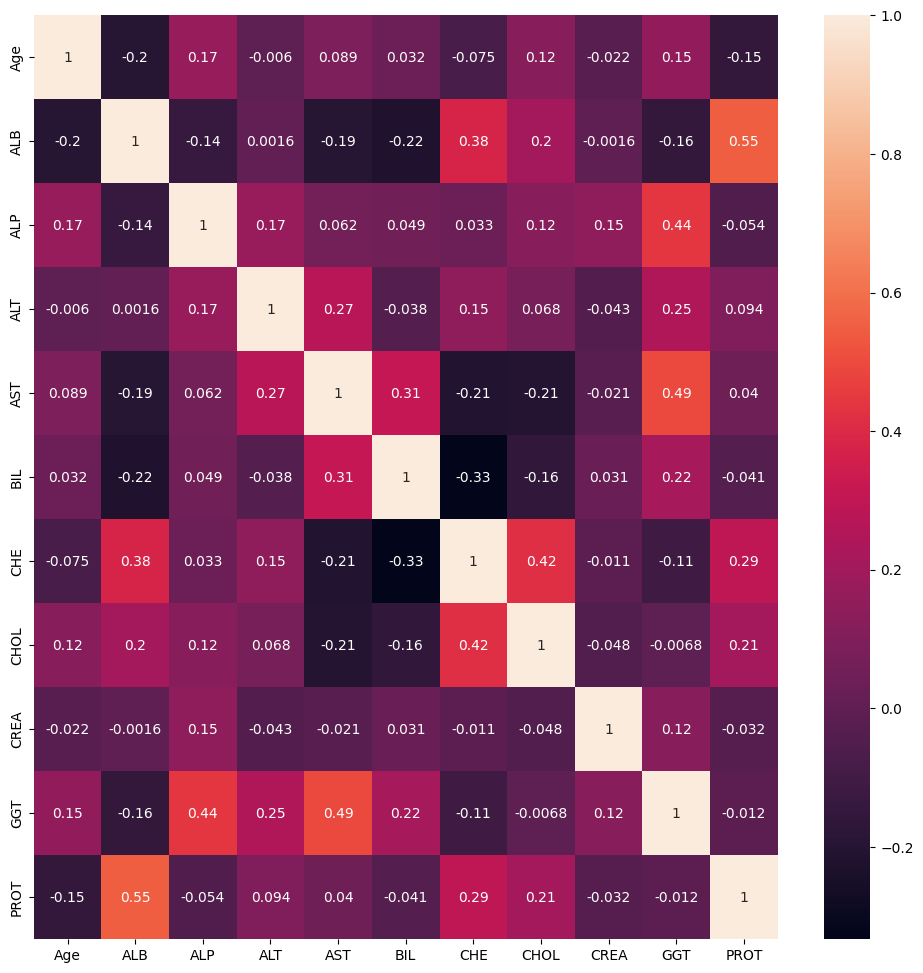

In [1052]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

Histogram based on "Age" feature.

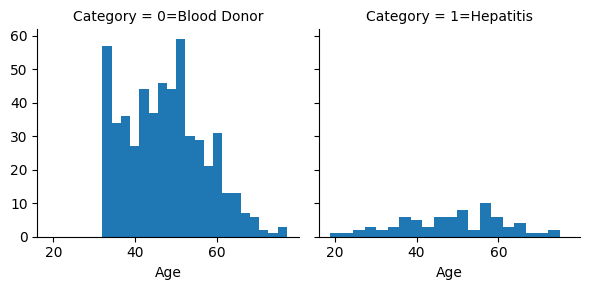

In [1053]:
g = sns.FacetGrid(df, col='Category')
g.map(plt.hist, 'Age', bins=20)

Histogram based on "Sex" feature.

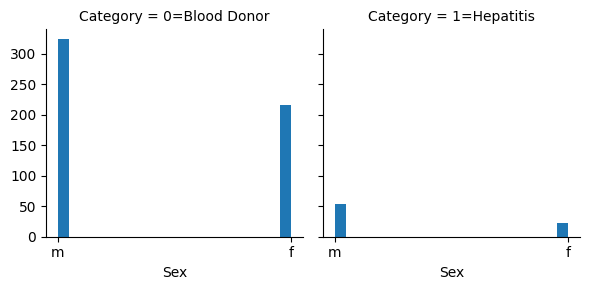

In [1054]:
g = sns.FacetGrid(df, col='Category')
g.map(plt.hist, 'Sex', bins=20)

**NO FEATURES WERE DROPPED AS NONE OF THEM WERE HIGHLY CORRELATED OR LOWLY CORRELATED.**

#Label Encoding:

Label encoding is a data preprocessing step that converts string data into numerical values, as machine learning models cannot handle string data. In the HCV dataset, "sex" and "Category" (the type of Hepatitis) were two string data types. Label encoding was applied to these columns, converting them into unique numerical values.

To verify that all the data were numerical, the df.info() function was employed, confirming that all features contained only numerical data. Following this confirmation, the MICE algorithm was used to handle missing values.


In [1055]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df['Sex']=le.fit_transform(df['Sex'])

#**Imputation**

 Data imputation is a critical step in preparing the data for machine learning. It allows one to handle missing values and ensures that the model can learn from as much relevant information as possible. By imputing missing data before the train-test split, it is possible to maintain the integrity of data and reduce the risk of data leakage, ultimately leading to more reliable and accurate machine learning models.



In [1056]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

X = df.drop('Category', axis=1)
Y = df['Category']

In [1057]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, tol=1e-100, max_iter=300, verbose=2, imputation_order='roman')

#MICE Algorithm:

The MICE (Multivariate Imputation by Chained Equations) algorithm is highly effective for handling missing values. It predicts missing values by observing changes in the nearest features for the target feature.

Iterative imputation using the MICE algorithm was applied, and the X variable was fitted for transformation. The resulting X variable was used for training and splitting the data, with an 80:20 train-test ratio and stratify=Y included in the train_test_split() function for improved performance.


In [1058]:
#Transforming the full X using mice algorithm
X = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (615, 12)
[IterativeImputer] Ending imputation round 1/300, elapsed time 0.02
[IterativeImputer] Change: 0.0, scaled tolerance: 1.0791e-97 
[IterativeImputer] Early stopping criterion reached.


#Train_test_split:
The datae is split as X and Y variables. All the
independent data are stored in X in the form of matrix. And all the
dependent data in Y in form vector. Here, 80% of the total samples are taken as training data where 20% of the data samples are reserved as testing data.



In [1059]:
#linear model import
from sklearn import datasets,linear_model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2 , random_state=10)

In [1060]:
#Transforming the full X using mice algorithm
X_train = imp.fit_transform(X_train)

[IterativeImputer] Completing matrix with shape (492, 12)
[IterativeImputer] Ending imputation round 1/300, elapsed time 0.04
[IterativeImputer] Change: 0.0, scaled tolerance: 6.509e-98 
[IterativeImputer] Early stopping criterion reached.


In [1061]:
#Checking value ratio
Y.value_counts()

0    540
1     75
Name: Category, dtype: int64

In [1062]:
#Checking Y_train Value Ratio
Y_train.value_counts()

0    432
1     60
Name: Category, dtype: int64

In [1063]:
#Checking Y_train Value Ratio
Y_test.value_counts()


0    108
1     15
Name: Category, dtype: int64

Hybrid Synthesis on the training dataset as it is an imbalanced one.

In [1064]:
#from imblearn.combine import SMOTETomek
#smt = SMOTETomek(random_state=42)
#X_train, Y_train = smt.fit_resample(X_train, Y_train)

In [1065]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [1066]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_train, Y_train= tl.fit_resample(X_train, Y_train)

Now, Visualization of data-set as binary class.

In [1067]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X)

import plotly.express as px
fig_1 = px.scatter(x=X_embedded[:, 0], y=X_embedded[:, 1], color=Y)
fig_1.show()

#Standard Scaling:
Standard scaling was used to bring all data points within a consistent range of values, enhancing model efficiency and reducing time complexity.


In [1068]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [1069]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test
X_train

array([[ 1.68352216e-01, -1.23632415e+00, -1.56740870e+00, ...,
         1.28199487e+01,  1.35317146e+00, -2.82498271e+00],
       [-1.33633426e+00,  8.08849361e-01,  9.01542554e-01, ...,
         8.04032546e-02, -2.73950413e-01,  1.79765247e-01],
       [-2.32897511e-01,  8.08849361e-01,  8.29978749e-01, ...,
         1.43642497e-01,  7.83125364e-01,  6.73696418e-01],
       ...,
       [ 4.69289512e-01, -1.23632415e+00, -1.08959542e-02, ...,
        -1.72553717e-01, -4.45517686e-01,  1.00298387e+00],
       [-3.33209942e-01,  8.08849361e-01, -1.71914514e-01, ...,
         2.38501362e-01, -5.02706777e-01, -1.81653990e+00],
       [-1.23602183e+00,  8.08849361e-01,  1.24147063e+00, ...,
         3.01740605e-01, -3.44053170e-01,  7.35437814e-01]])

#Classifier Models:
Various classifier models, including RandomForestClassifier, XGBoost_classifier, AdaBoost Classifier, and GradientBoostingClassifier, were employed to train and assess the dataset. The AdaBoost Classifier Algorithm demonstrated the highest accuracy, reaching approximately 95%, followed by XGBoost, GradientBoost, and RandomForest classifier models.

**Summary of Classifier Models:**
- AdaBoost Classifier: Known for adaptive boosting and combining weak learners to improve accuracy.
- XGBoost Classifier: An efficient implementation of gradient boosting, which predicts a target variable using a set of simpler models.
- GradientBoost: Utilizes boosting to combine weak learners into a strong model by gradually building base models.
- RandomForest: A machine learning method that employs ensemble learning to combine multiple classifiers for improved accuracy.




In [1070]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(max_depth=5, random_state=5)
clf1.fit(X_train, Y_train)

clf1.score(X_train,Y_train)



0.9897540983606558

In [1071]:
clf1.score(X_test,Y_test)

0.967479674796748

In [1072]:
import xgboost as xgb
clf2= xgb.XGBClassifier(random_state=0)
clf2.fit(X_train, Y_train)
clf2.score(X_train, Y_train)


1.0

In [1073]:
clf2.score(X_test,Y_test)

0.967479674796748

In [1074]:

from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=5, random_state=0).fit(X_train, Y_train)
clf3.fit(X_train, Y_train)

clf3.score(X_train, Y_train)


1.0

In [1075]:
clf3.score(X_test, Y_test)

0.959349593495935

In [1076]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf4 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,algorithm="SAMME",
    )

clf4.fit(X_train,Y_train)
clf4.score(X_train,Y_train)

1.0

In [1077]:
clf4.score(X_test, Y_test)

0.975609756097561

#Result :
The Comparative result of different is given below:
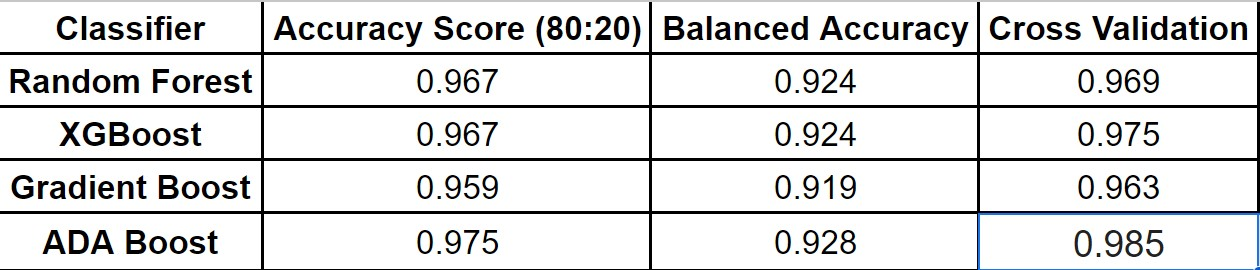

Here,it is clear that ADA BOOST classifier is the best accuracy score of about
97.5%.

## Performance measure

In [1078]:
pred=clf4.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

#Confusion Matrix:
A confusion matrix is employed for assessing the effectiveness of a classification model by contrasting observed outcomes with anticipated results. It offers valuable insights into the model's precision and the specific kinds of mistakes it generates.



In [1079]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred)

array([[107,   1],
       [  2,  13]])

#Precision vs. Recall:
Precision evaluates the precision of positive forecasts, while recall gauges the number of genuine positives accurately anticipated by the model.These metrics are crucial for evaluating classification model performance.


In [1080]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.93      0.87      0.90        15

    accuracy                           0.98       123
   macro avg       0.96      0.93      0.94       123
weighted avg       0.98      0.98      0.98       123



#Balanced Accuracy:
Balanced accuracy is essential for both binary and multi-class classification, especially when dealing with imbalanced data. It is the mean of sensitivity and specificity.


In [1081]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test,pred)

0.9287037037037037

# K-Fold CV
**Cross Validation score**

In [1082]:
from sklearn.model_selection import cross_val_score
crs_score=cross_val_score(clf4.fit(X_train,Y_train),X_train,Y_train,cv=9)
crs_score

array([1.        , 0.98181818, 0.98148148, 0.98148148, 0.96296296,
       1.        , 1.        , 1.        , 0.96296296])

# Average cross validation score

In [1083]:
print(np.mean(crs_score))

0.9856341189674525


# g-mean score

In [1084]:
from imblearn.metrics import geometric_mean_score
print('The geometric mean is {}'.format(geometric_mean_score(Y_test,pred)))

The geometric mean is 0.926629362425259
